# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Abigail Excelsis Deo
- **Email:** abigailexcelsisdeo@gmail.com
- **ID Dicoding:** deo404

## Menentukan Pertanyaan Bisnis

- Bagaimana kinerja dari sistem peminjaman sepeda dalam beberapa bulan ini? 
- Bagaimana musim berpengaruh pada jumlah rental sepeda?
- Bagaimana mengetahui karakteristik dari pengguna rental sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Data Wrangling

### Gathering Data   
Dimulai dengan mengambil data dari dataset yang telah disediakan. Dataset yang digunakan dalam project ini adalah dataset Bike.

In [2]:
day_df = pd.read_csv("./data/day.csv")
hour_df = pd.read_csv("./data/hour.csv")

day_df.head()
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data   
Disini adalah tahapan dimana kita melakukan pengecekan untuk mengetahui apakah dataset yang kita gunakan ini memiliki data yang kosong ataupun data duplikat. Untuk pengecekan, dilakukan dengan menggunakan method di bawah.

In [3]:
day_df.info()
hour_df.info()

# check missing val
day_df.isna().sum() # 0 missing val
hour_df.isna().sum() # 0 missing val

# check duplicated val
print("Jumlah duplikasi day.csv: ", day_df.duplicated().sum()) # 0 duplicated val
print("Jumlah duplikasi hour.csv: ", hour_df.duplicated().sum()) # 0 duplicated val

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

### Cleaning Data

In [4]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

## Exploratory Data Analysis (EDA)

### Explore data day_df
Pertama, kita akan mengeksplor day_df. Disini kita akan melihat rangkuman parameter statistik dari data day_df dengan menggunakan describe().

In [5]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Dalam hasil tersebut, karena kita ingin mengetahui seberapa besar pengaruh musim pada minat pengguna untuk merental sepeda maka dicari data pada kolom season. Untuk data season terbagi menjadi 4 kategori, yaitu nilai 1 untuk springer, 2 untuk summer, 3 untuk fall, dan 4 untuk winter.

In [6]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": "sum"
})

,instant,cnt
season,,
1,181,471348
2,184,918589
3,188,1061129
4,178,841613


### Explore hour_df
Kita akan menjalan describe() untuk mengetahui rangkuman parameter statistik dari hour_df.

In [7]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Dengan hasil tersebut, kita dapat mengeksplor bagaimana jam berpengaruh pada peminjaman sepeda. Untuk mengetahui hal tersebut, kita dapat menggunakan method groupby().

In [8]:
hour_df.groupby(by="hr").agg({
    "instant": "nunique",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False).head(5)

,instant,cnt
hr,,
17,730,336860
18,728,309772
8,727,261001
16,730,227748
19,728,226789


Dari hasil tersebut, kita dapat mengetahui bahwa jam 17 (5 p.m.) dan 18 (6 p.m.) adalah jam dengan jumlah peminjaman sepeda terbanyak.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana kinerja dari sistem peminjaman sepeda dalam beberapa bulan ini?

Pada langkah ini, kita akan melakukan sebuah analisis yang bertujuan untuk mengetahui seberapa besar rental sepeda yang didapatkan dalam sebulan. Analisis ini akan menggunakan tanggal dan cnt yang ada dalam data.

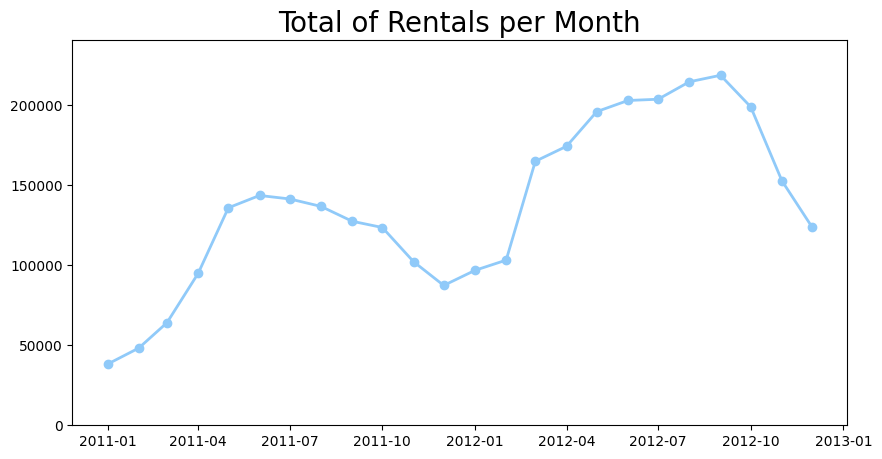

In [9]:
q1_df = day_df
q1_df['year'] = q1_df['dteday'].dt.year
q1_df = q1_df.groupby([q1_df['dteday'].dt.strftime('%Y-%m'), 'year']).agg({
    'cnt': 'sum'
})
q1_df.index = q1_df.index.set_names(['month_year', 'year'])
q1_df.reset_index(inplace=True)
q1_df['month_year'] = pd.to_datetime(q1_df['month_year'])
q1_df.rename(columns={
    'cnt': 'total_rentals'
}, inplace=True)
q1_df.sort_values(by='month_year', ascending=False)

plt.figure(figsize=(10,5))
plt.plot(q1_df['month_year'],q1_df['total_rentals'], marker='o', linewidth=2, color='#90CAF9')
plt.title('Total of Rentals per Month', loc='center', fontsize=20)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
plt.ylim(0, q1_df['total_rentals'].max() * 1.1)
plt.show()

Penurunan jumlah rental signifikan terjadi mulai dari bulan September hingga Desember baik di tahun 2011 maupun 2012. Hal tersebut tentunya memiliki dampak pada perusahaan. Disini kita tidak membahas mengenai pendapatan namun mengarah ke pengaruh musim pada jumlah rental sepeda yang akan dibahas pada pertanyaan selanjutnya.

### Pertanyaan 2:
Bagaimana musim berpengaruh pada jumlah rental sepeda?

Pada tahap ini, kita akan melakukan analisis pada musim yang telah tercatat pada dataset. Musim mana sajakah yang sebenarnya cukup berpengaruh pada naik turunnya demand rental sepeda.

C:\Users\IDe\AppData\Local\Temp\ipykernel_20944\3941022301.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cnt', y='season_name', data=season_most_liked_df.head(), palette=colors)


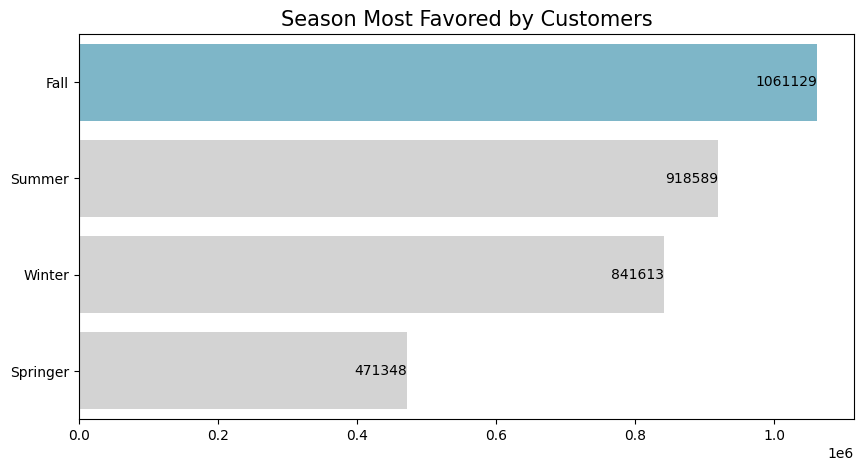

In [10]:
q2_df = day_df
q2_df['season_name'] = q2_df.season.apply(lambda x: "Springer" if x == 1 else ("Summer" if x == 2 else ("Fall" if x == 3 else "Winter")))
season_most_liked_df = q2_df.groupby(by='season_name').cnt.sum().sort_values(ascending=False).reset_index()

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10, 5))
sns.barplot(x='cnt', y='season_name', data=season_most_liked_df.head(), palette=colors)
plt.ylabel(None)
plt.xlabel(None)
plt.title("Season Most Favored by Customers", loc='center', fontsize=15)
for index, value in enumerate(season_most_liked_df.head()['cnt']):
    plt.text(value, index, str(value), ha='right', va='center')
plt.show()

Melalui hasil di atas, dapat dilihat bahwa musim Fall adalah musim dimana sepeda paling banyak dirental, diikuti oleh Summer, Winter, dan terakhir, Springer.

### Pertanyaan 3:
Bagaimana mengetahui karakteristik dari pengguna rental sepeda?

Tahap ini menggunakan metode k-means dalam data mining untuk mengetahui bagaimana sebenarnya karakteristik dari setiap pengguna rental sepeda. Hal ini dapat bermanfaat dalam menentukan strategi, seperti berapa banyak sepeda yang harus siap pada jam-jam tertentu.

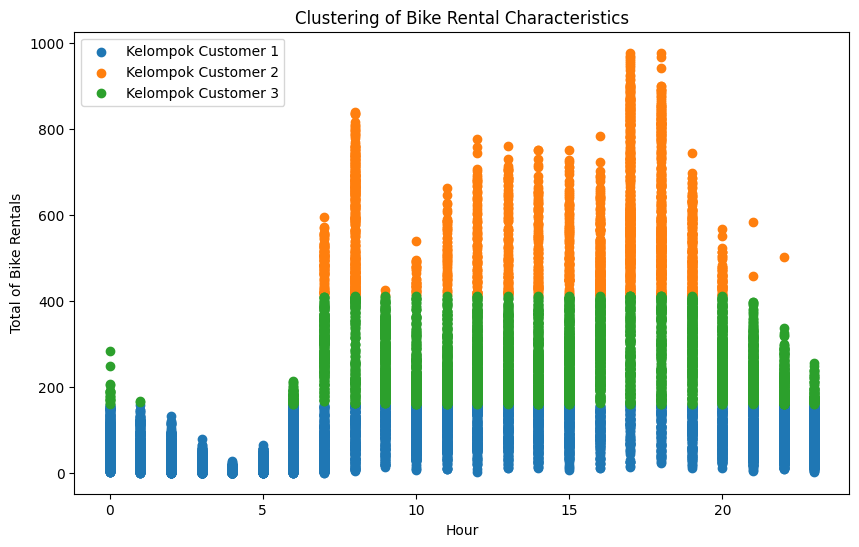

In [11]:
q4_df = hour_df

kmeans_clustering_parameter = q4_df[['cnt', 'hr']]

kmeans_clustering = KMeans(n_clusters=3)
kmeans_clustering.fit(kmeans_clustering_parameter)

q4_df['cluster'] = kmeans_clustering.labels_

plt.figure(figsize=(10, 6))
for cluster in sorted(q4_df['cluster'].unique()):
    cluster_data = q4_df[q4_df['cluster'] == cluster]
    plt.scatter(cluster_data['hr'], cluster_data['cnt'], label=f'Kelompok Customer {cluster+1}')

plt.xlabel('Hour')
plt.ylabel('Total of Bike Rentals')
plt.title('Clustering of Bike Rental Characteristics')
plt.legend()
plt.show()

Clustering customer atau pengguna rental sepeda terbagi menjadi 3 berdasarkan jam aktif mereka. Kelompok Customer 1 menjadi pengguna yang paling sering aktif namun dengan jumlah yang tidak terlalu banyak, sedangkan Kelompok Customer 3 adalah jumlah yang paling banyak namun hanya aktif di jam 11-19.

## Conclusion

- Conclution pertanyaan 1:   
  Berdasarkan data yang ditampilkan, diketahui bahwa untuk rental sepeda saat ini terjadi tren penurunan yang dimulai dari bulan November hingga Desember. Memang jika dilihat dari tahun 2011 awal terjadi kenaikan yang signifikan, yang dimana saat ini jumlah pengguna yang rental sepeda mencapai dua kali lipatnya. Namun jika dilihat melalui pola, maka kita tahu bahwa di bulan yang sama di tahun lalu (2011) juga terjadi penurunan minat yang kemudian diikuti dengan permintaan yang signifikan di antara bulan Januari hingga April.
- Conclution pertanyaan 2:   
  Diperoleh dari visual data sebelumnya, dapat diketahui bahwa untuk musim yang paling dianggap nyaman untuk bersepeda adalah musim Fall. Hal tersebut dapat diketahui dengan melihat jumlah pengguna rental yang sangat signifikan (mencapai 1 juta pengguna). Selain itu, ditemukan hal cukup mengherankan karena disini musim Winter bukan merupakan musim dengan pengguna rental sepeda paling sedikit, tetapi musim Springer.
- Conclution pertanyaan 3:   
  Berdasarkan visualisasi data "Clustering of Bike Rental Characteristics" yang telah disajikan, kita dapat menyimpulkan bahwa pengguna rental sepeda secara umum terbagi menjadi 3 kelompok. 3 kelompok tersebut memiliki ciri khas tersendiri, seperti kelompok 1 dimana mereka aktif hampir sepanjang hari namun dengan jumlah yang tidak banyak, kelompok 2 adalah mereka yang aktif hampir menyamai jam kerja kantor namun dengan memiliki jumlah ditengah-tengah, kelompok 3 adalah kelompok yang memiliki jumlah rental sepeda paling banyak, namun mereka hanya aktif paling banyak di jam berangkat dan pulang kantor.